In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

In [109]:
frame = {
    "x1": [1, 9.4, 2.5, 8, 0.5, 7.9, 7, 2.8, 1.2, 7.8],
    "x2": [1, 6.4, 2.1, 7.7, 2.2, 8.4, 7, 0.8, 3.0, 6.1],
    "x3": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    "d": [1, -1, 1, -1, 1, -1, -1, 1, 1, -1]
}
df = pd.DataFrame(frame)
df

,x1,x2,x3,d
0,1.0,1.0,1,1
1,9.4,6.4,1,-1
2,2.5,2.1,1,1
3,8.0,7.7,1,-1
4,0.5,2.2,1,1
5,7.9,8.4,1,-1
6,7.0,7.0,1,-1
7,2.8,0.8,1,1
8,1.2,3.0,1,1
9,7.8,6.1,1,-1


In [110]:
w = np.array([0.75, 0.5, -0.6])
c = 0.2

In [111]:
epoch = 1
errors = []
epochs = []
while True:
    iter_error = 0
    iter = 1
    print(f"ЭПОХА №{epoch}")
    for index, row in enumerate(df.values):
        print(f"Итерация №{iter}")

        print(f"x = {row}")
        d = row[-1]

        S = sum(w * row[:-1])
        print(f"S = {S}")

        y = S > 0
        if y:
            y = 1
        else:
            y = -1
        print(f"y = {y}")
        print(f"d = {d}")
        if y != d:
            iter_error += 1
            det_w = c * (d - y) * row[:-1]
            print(f"det_w = {det_w}")

            w = w + det_w
        
        print(w)
        print()
        iter += 1

    errors.append(iter_error)
    epochs.append(epoch)
    if iter_error == 0:
        break
    epoch += 1


ЭПОХА №1
Итерация №1
x = [1. 1. 1. 1.]
S = 0.65
y = 1
d = 1.0
[ 0.75  0.5  -0.6 ]

Итерация №2
x = [ 9.4  6.4  1.  -1. ]
S = 9.65
y = 1
d = -1.0
det_w = [-3.76 -2.56 -0.4 ]
[-3.01 -2.06 -1.  ]

Итерация №3
x = [2.5 2.1 1.  1. ]
S = -12.851000000000003
y = -1
d = 1.0
det_w = [1.   0.84 0.4 ]
[-2.01 -1.22 -0.6 ]

Итерация №4
x = [ 8.   7.7  1.  -1. ]
S = -26.074000000000005
y = -1
d = -1.0
[-2.01 -1.22 -0.6 ]

Итерация №5
x = [0.5 2.2 1.  1. ]
S = -4.289000000000001
y = -1
d = 1.0
det_w = [0.2  0.88 0.4 ]
[-1.81 -0.34 -0.2 ]

Итерация №6
x = [ 7.9  8.4  1.  -1. ]
S = -17.355000000000004
y = -1
d = -1.0
[-1.81 -0.34 -0.2 ]

Итерация №7
x = [ 7.  7.  1. -1.]
S = -15.250000000000004
y = -1
d = -1.0
[-1.81 -0.34 -0.2 ]

Итерация №8
x = [2.8 0.8 1.  1. ]
S = -5.540000000000001
y = -1
d = 1.0
det_w = [1.12 0.32 0.4 ]
[-0.69 -0.02  0.2 ]

Итерация №9
x = [1.2 3.  1.  1. ]
S = -0.688000000000001
y = -1
d = 1.0
det_w = [0.48 1.2  0.4 ]
[-0.21  1.18  0.6 ]

Итерация №10
x = [ 7.8  6.1  1.  -1. ]
S

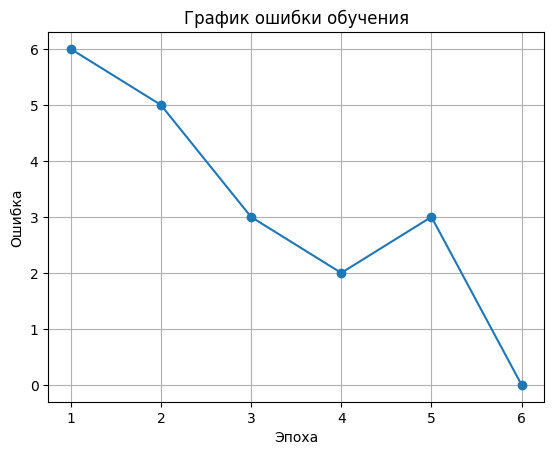

In [112]:
plt.plot(epochs, errors, marker='o')
plt.title("График ошибки обучения")
plt.xlabel("Эпоха")
plt.ylabel("Ошибка")
plt.grid()
plt.show()

In [113]:
print("ИТОГ ОБУЧЕНИЯ")
print(f"Обученный вектор: {w}")
latex_str = f"S = {w[0]:.2f}x_1 {w[1]:.2f}x_2 + {w[2]:.2f}"
display(Math(latex_str))

ИТОГ ОБУЧЕНИЯ
Обученный вектор: [-0.69 -0.26  3.8 ]


<IPython.core.display.Math object>

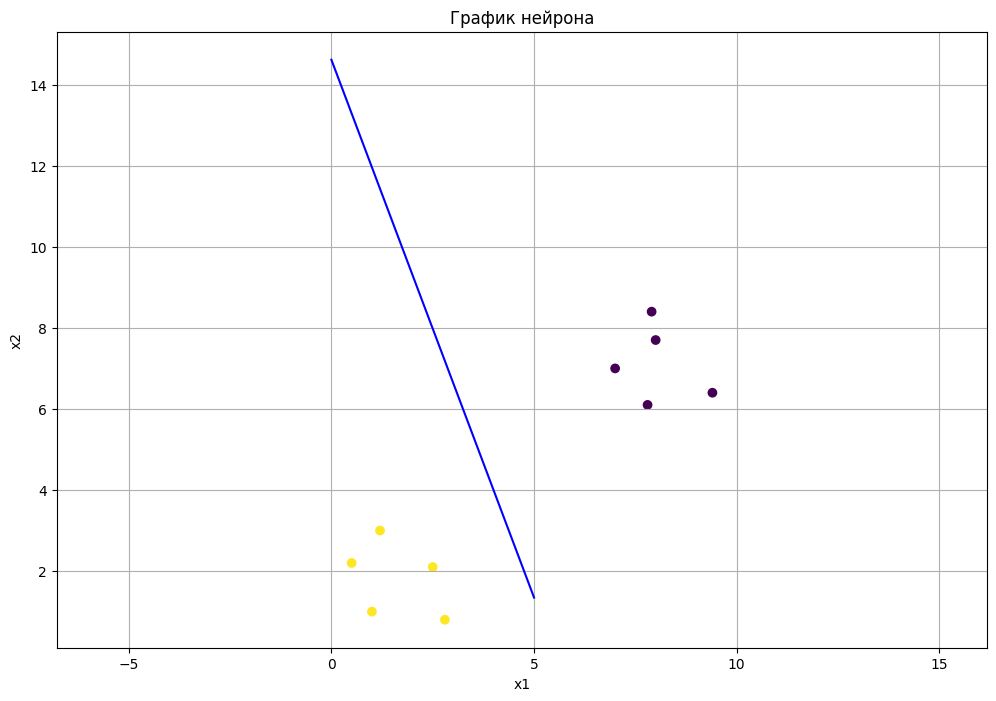

In [119]:
w1, w2, w3 = w
x1_vals = np.linspace(0, 5, 100)
x2_vals = -(w1 * x1_vals + w3) / w2

plt.figure(figsize=(12, 8))
plt.plot(x1_vals, x2_vals, color='blue')
plt.scatter(df["x1"], df["x2"], c=df["d"], cmap='viridis')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("График нейрона")
plt.grid()
plt.axis('equal')
plt.show()